<a href="https://colab.research.google.com/github/NavinAnto-03/AI-Projects/blob/main/Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving healthcare_iot_target_dataset.csv to healthcare_iot_target_dataset.csv
Epoch 1/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4407 - loss: 0.8510 - val_accuracy: 0.5312 - val_loss: 0.7245
Epoch 2/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3527 - loss: 0.8218 - val_accuracy: 0.5625 - val_loss: 0.7017
Epoch 3/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4500 - loss: 0.7727 - val_accuracy: 0.6250 - val_loss: 0.6878
Epoch 4/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4517 - loss: 0.7504 - val_accuracy: 0.5312 - val_loss: 0.6782
Epoch 5/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5408 - loss: 0.7238 - val_accuracy: 0.4688 - val_loss: 0.6744
Epoch 6/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5215 - loss: 0.7399 - val_accuracy: 0.4688 - val_loss: 0.6746
Epoch 7/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5548 - loss: 0.6796 - val_accuracy: 0.5312 - val_loss: 0.6760
Epoch 8/46
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - ac

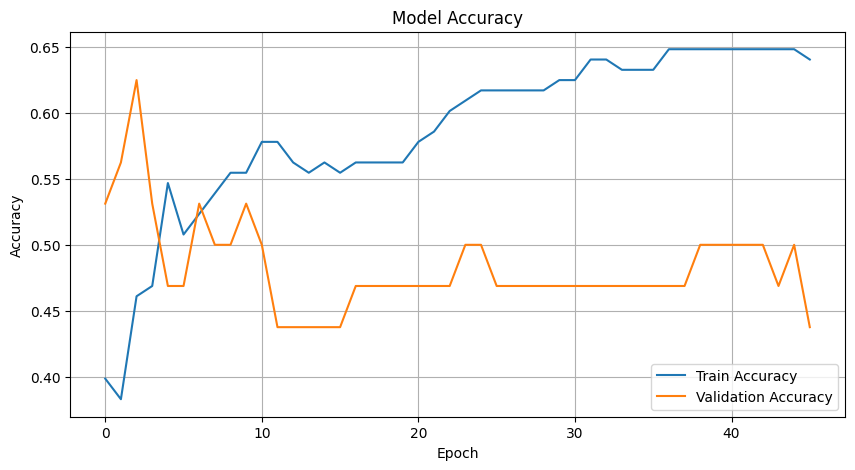

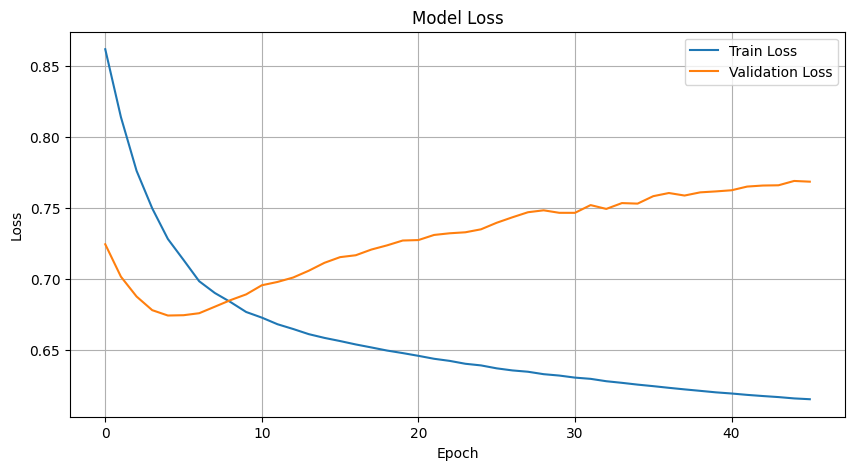

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("healthcare_iot_target_dataset.csv")

feature_cols = [
    "Temperature (°C)", "Systolic_BP (mmHg)", "Diastolic_BP (mmHg)",
    "Heart_Rate (bpm)", "Device_Battery_Level (%)", "Battery_Level (%)"
]
target_col = "Target_Health_Status"

X = df[feature_cols].values
y = df[target_col].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

y_train_cat = tf.keras.utils.to_categorical(y_train_raw)
y_test_cat = tf.keras.utils.to_categorical(y_test_raw)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat,
                    epochs=46,
                    batch_size=16,
                    validation_split=0.2)

loss, acc = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {acc:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_test_raw, y_pred_classes,
                          target_names=label_encoder.classes_))

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()